In [ ]:
###Implementing Simple Linear Regression from Scratch 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv('Salary_Data.csv')

In [3]:
X=np.array(ds['YearsExperience'].values)
y=np.array(ds['Salary'].values)

In [4]:
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [5]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

In [6]:
def mean(X):
    return np.sum(X)/len(X)

In [7]:
def variance(X):
    mean_value = mean(X)
    return np.sum((X-mean_value)**2)/len(X)

In [8]:
def norm(X):
    mean_value = mean(X)
    variance_value = variance(X)
    return (X-mean_value)/np.sqrt(variance_value)

In [9]:
plt.plot(X,y)

In [10]:
import random

In [11]:
class LrRegression:
    #init function with learning rate lr, max_iteration=max_iteration,threshold as arguments
    def __init__(self,lr=0.1,max_iteration=2000,threshold=1e-6):
        self.lr=lr
        self.max_iteration = max_iteration
        self.threshold = threshold
        self.weights = random.uniform(-1,1)
        self.bias =  random.uniform(-1,1)
    def predict(self,X):
        return  self.weights*X+self.bias #y_pred = ax+c a is weight and c is bias
    def fit(self,X,y):
        y_pred = self.predict(X)
        errors = y-y_pred
        n=len(X)
        #To append previous and current loss 
        loss_history = []
        #Calculating loss using loss function
        prev_loss = 1/(2*n) * np.sum(errors**2)
        loss_history.append(prev_loss)
        for i in range(self.max_iteration):
            w_grad = 1/n *np.sum(errors*X)
            b_grad = 1/n *np.sum(errors)
            self.weights += self.lr * w_grad
            self.bias +=  self.lr * b_grad
            y_pred = self.predict(X)
            errors = y-y_pred
            curr_loss = 1/(2*n) * np.sum(errors**2)
            if np.abs(curr_loss - prev_loss) < self.threshold:
             break
            prev_loss = curr_loss
            loss_history.append(curr_loss)
        return loss_history
    def plot(self,X,y):
        y_pred = self.predict(X)
        plt.plot(X,y)
        plt.plot(X,y_pred)

In [12]:
model = LrRegression()

In [13]:
loss_history = model.fit(norm(X),y)

In [14]:
loss_history

[3251499190.1111393,
 2636685084.40364,
 2138685658.7805648,
 1735306124.0258744,
 1408568700.8745747,
 1143911388.1220222,
 929538964.7924547,
 755897301.8955053,
 615247554.9489759,
 501321259.92228717,
 409040960.9506693,
 334293918.78365886,
 273748814.62838024,
 224707280.26260465,
 184983637.42632645,
 152807486.7289411,
 126744804.66405897,
 105634032.19150452,
 88534306.4887354,
 74683528.66949232,
 63464398.63590549,
 54376903.30870012,
 47016032.09366375,
 41053726.4094843,
 36224258.805299,
 32312390.04590887,
 29143776.350802854,
 26577199.257766962,
 24498271.812407915,
 22814340.581667125,
 21450356.284767073,
 20345529.004278,
 19450618.907081872,
 18725741.728352994,
 18138591.213582613,
 17662999.296618603,
 17277769.843877763,
 16965733.98715767,
 16712984.943214398,
 16508258.217620356,
 16342429.56988918,
 16208108.365226924,
 16099308.189450495,
 16011180.047071597,
 15939796.25174468,
 15881975.377529884,
 15835140.469415894,
 15797204.193843564,
 15766475.8106299

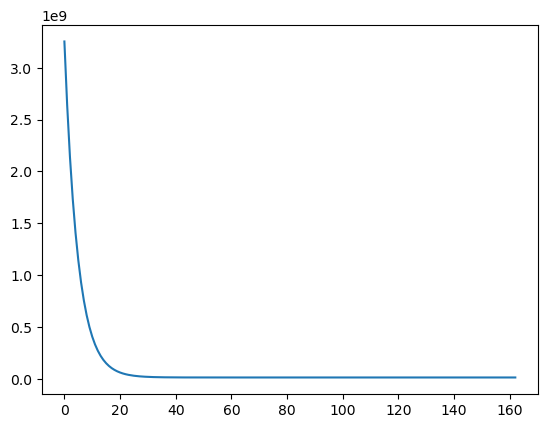

In [36]:
plt.plot(loss_history)
plt.show()

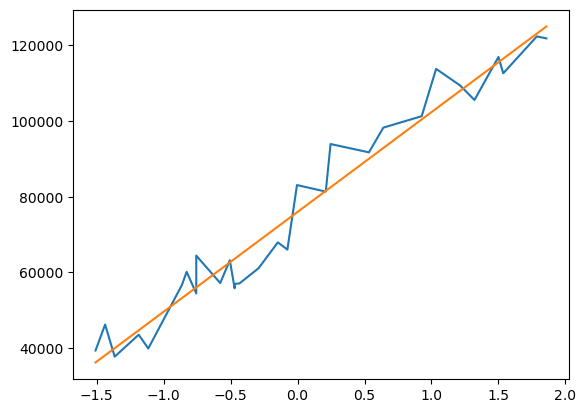

In [34]:
model.plot(norm(X),y)
plt.show()

In [ ]:
## The above is best fit line